<a href="https://colab.research.google.com/github/Wassifoo/Data-Mining-Projects/blob/main/Markov_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download aadityabansalcodes/telecommunications-industry-customer-churn-dataset

 85% 5.00M/5.86M [00:00<00:00, 45.0MB/s]
100% 5.86M/5.86M [00:00<00:00, 49.5MB/s]


In [ ]:
! unzip telecommunications-industry-customer-churn-dataset.zip

Archive:  telecommunications-industry-customer-churn-dataset.zip
  inflating: CustomerChurn.csv       
  inflating: CustomerChurn.xlsx      
  inflating: Telco_customer_churn.csv  
  inflating: Telco_customer_churn.xlsx  
  inflating: Telco_customer_churn_demographics.csv  
  inflating: Telco_customer_churn_demographics.xlsx  
  inflating: Telco_customer_churn_location.csv  
  inflating: Telco_customer_churn_location.xlsx  
  inflating: Telco_customer_churn_population.csv  
  inflating: Telco_customer_churn_population.xlsx  
  inflating: Telco_customer_churn_services.csv  
  inflating: Telco_customer_churn_services.xlsx  
  inflating: Telco_customer_churn_status.csv  
  inflating: Telco_customer_churn_status.xlsx  


<ipython-input-15-b1ab30539e55>:8: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_churn = df.corrwith(df['Churn'])


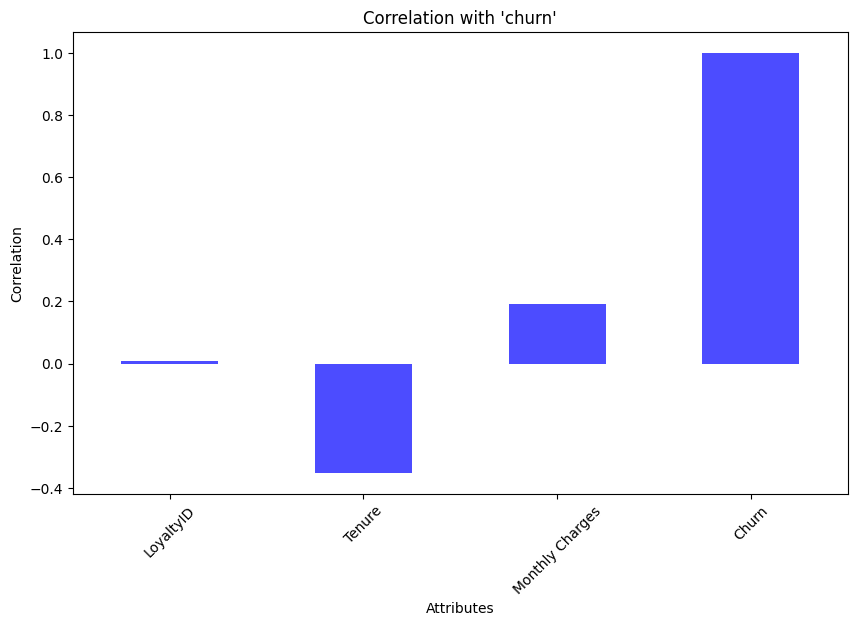

<Figure size 1000x600 with 0 Axes>

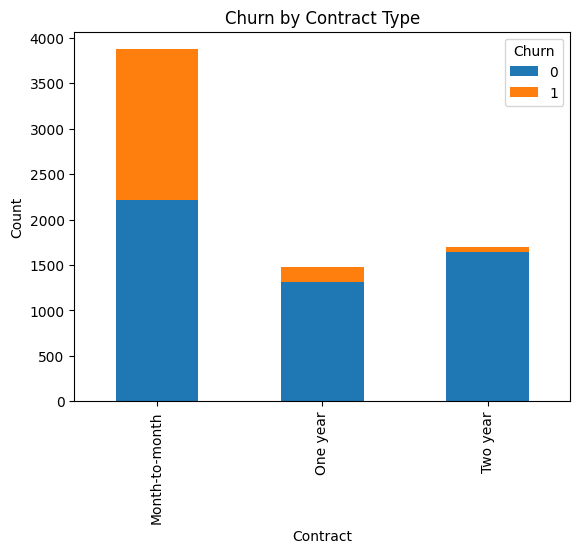

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CustomerChurn.csv')
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
correlation_with_churn = df.corrwith(df['Churn'])


#corr
plt.figure(figsize=(10, 6))
correlation_with_churn.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Correlation with 'churn'")
plt.xlabel('Attributes')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()




independent_variable = 'Contract'
dependent_variable = 'Churn'


grouped_data = df.groupby([independent_variable, dependent_variable]).size().unstack().fillna(0)


#Bar Chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Churn by Contract Type')
plt.xlabel(independent_variable)
plt.ylabel('Count')

# Display the chart
plt.show()

In [ ]:
df = pd.read_csv("CustomerChurn.csv", delimiter=',')
markov_model = {}

for i in range(len(df['Contract'])):
   curr_state = df['Contract'][i]
   next_state = df['Churn'][i]
   if curr_state not in markov_model:
      markov_model[curr_state] = {}
      markov_model[curr_state][next_state] = 1
   else:
    if next_state in markov_model[curr_state]:
      markov_model[curr_state][next_state] += 1
    else:
      markov_model[curr_state][next_state] = 1

for curr_state, transition in markov_model.items():
    total = sum(transition.values())
    for state, count in transition.items():
      markov_model[curr_state][state] = count/total


print("number of states = ", len(markov_model.keys()))
print("Month-to-month:",markov_model["Month-to-month"])
print("One year:",markov_model["One year"])
print("Two year:",markov_model["Two year"])

number of states =  3
Month-to-month: {'No': 0.5729032258064516, 'Yes': 0.4270967741935484}
One year: {'No': 0.8873048200950441, 'Yes': 0.11269517990495587}
Two year: {'No': 0.9716814159292035, 'Yes': 0.02831858407079646}
